In [ ]:
import numpy as np
from sklearn.datasets import make_blobs

In [ ]:
class ToyDataGenerator():
    
    def __init__(self, 
                 n_inliers, 
                 n_features,
                 random_state=0):
        
        self.n_inliers = n_inliers
        self.n_features = n_features
        self.blobs_params = dict(random_state=0, 
                                 n_samples=self.n_inliers, 
                                 n_features=self.n_features)
        
    def feature_generator(self, 
                          centers=None, 
                          cluster_std=None):
        if not centers:
            centers=np.random.rand(self.n_features, 
                                   self.n_features)
        if not cluster_std:
            cluster_std = 0.5
        X, clust = make_blobs(centers=centers, 
                           cluster_std=cluster_std,
                           **self.blobs_params)
        return X
    
    def target_generator_independent(self, 
                                     X, 
                                     degrees=1, 
                                     coeffs=None):
        """ Generate target for given numerical features."""
        y = np.zeros(X.shape[0])

        for dg in range(degrees):
            indxs = np.random.choice(X.shape[1], dg)
            coefs = np.random.randint(-4, 4, size=len(indxs))
            print('Coefficients are', coefs)
            print('indeces are', indxs)
            for c, indx in zip(coefs, indxs):
                y += c*X[:,indx]
        return y
    
    def outlier_generator(self, 
                          X, 
                          y, 
                          ratio=0.1):
        """ Generate outliers in the range of dataset."""
        X_min = X.min(axis=0)
        X_max = X.max(axis=0)
        y_min = y.min()
        y_max = y.max()

        N_outlier = int(X.shape[0]*ratio)
        X_outlier = np.zeros((N_outlier, X.shape[1]))
        for i in range(X.shape[1]):
            X_outlier[:,i] = np.random.uniform(X_min[i], X_max[i], N_outlier)

        y_outlier = np.random.uniform(y_min, y_max, N_outlier)

        return X_outlier, y_outlier

In [ ]:
!ls ../

In [1]:
import sys
sys.path.append('../src/')
from data_generator import ToyDataGenerator

In [2]:
n_samples = 300
n_features = 3
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

In [3]:
dgenerator = ToyDataGenerator(n_inliers, n_features)

In [4]:
X = dgenerator.feature_generator()
y = dgenerator.target_generator_independent(X, n_features)

Coefficients are []
indeces are []
Coefficients are [1]
indeces are [1]
Coefficients are [2 2]
indeces are [1 0]


In [5]:
X_outlier, y_outlier = dgenerator.outlier_generator(X, y)

In [6]:
import matplotlib.pyplot as pl

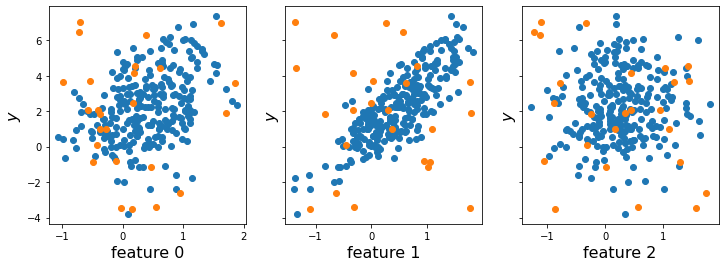

In [7]:
fig, ax = pl.subplots(1, X.shape[1], figsize=(4*X.shape[1],4), sharey=True)
for i in range(X.shape[1]):
    ax[i].scatter(X[:,i], y)
    ax[i].scatter(X_outlier[:,i], y_outlier)
    ax[i].set_xlabel(f'feature {i}', fontsize=16)
    ax[i].set_ylabel(r'$y$', fontsize=16)